In [33]:
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import fiona

## Single Band Raster - Digital Elevation Model

In [34]:
raster_path = (
    "./data/taalvolcano.tif"
)
src = rasterio.open(raster_path)
print(src)

<open DatasetReader name='./data/taalvolcano.tif' mode='r'>


In [35]:
src.name, src.meta

('./data/taalvolcano.tif',
 {'driver': 'GTiff',
  'dtype': 'float32',
  'nodata': None,
  'width': 1848,
  'height': 1367,
  'count': 1,
  'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 51N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32651"]]'),
  'transform': Affine(30.0, 0.0, 256025.17562363227,
         0.0, -30.0, 1566058.913711707)})

In [36]:
src.width, src.height

(1848, 1367)

In [37]:
src.dtypes

('float32',)

In [38]:
# The 6 parameters that map from pixel to real space
src.transform

Affine(30.0, 0.0, 256025.17562363227,
       0.0, -30.0, 1566058.913711707)

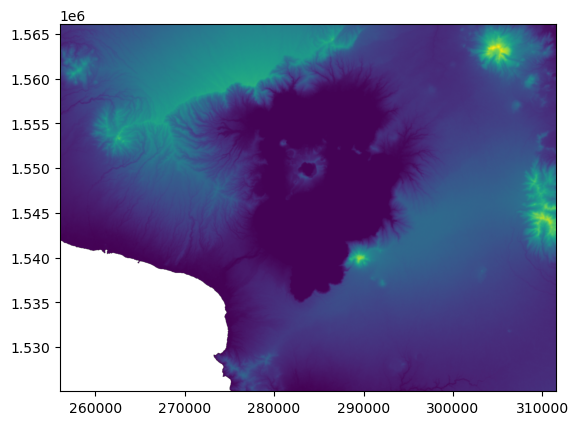

<Axes: >

In [39]:
rasterio.plot.show(src)

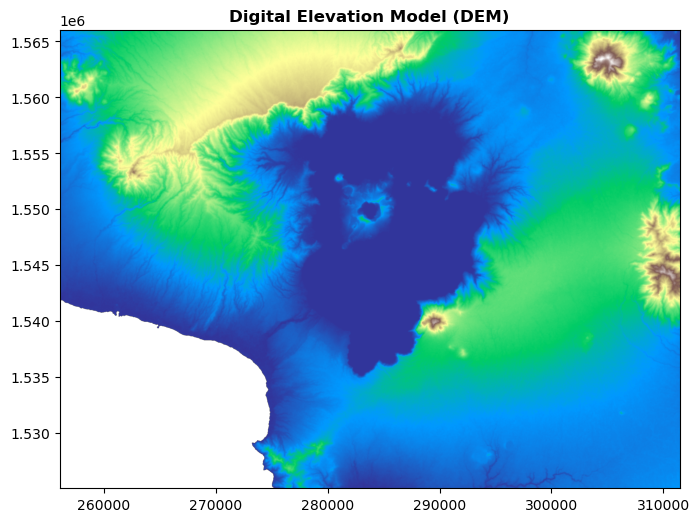

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM)")
plt.show()

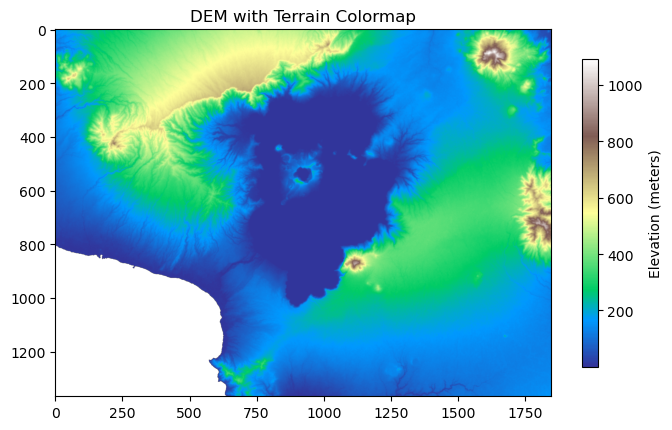

In [41]:
elev_band = src.read(1)
plt.figure(figsize=(8, 8))
plt.imshow(elev_band, cmap="terrain")
plt.colorbar(label="Elevation (meters)", shrink=0.5)
plt.title("DEM with Terrain Colormap")
plt.show()

## Multi-band Raster 

In [42]:
#https://github.com/wschwanghart/DEMs/blob/master/tibet.tif

landsat_philly_path = (
    "./data/landsat8_philly.tif"
)
landsat_philly = rasterio.open(landsat_philly_path)
landsat_philly

<open DatasetReader name='./data/landsat8_philly.tif' mode='r'>

In [43]:
landsat_philly.crs, landsat_philly.bounds

(CRS.from_wkt('PROJCS["WGS 84 / UTM zone 18N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32618"]]'),
 BoundingBox(left=476064.3596176505, bottom=4413096.927074196, right=503754.3596176505, top=4443066.927074196))

In [44]:
landsat_philly.count, landsat_philly.indexes

(10, (1, 2, 3, 4, 5, 6, 7, 8, 9, 10))

In [45]:
# This is just a numpy array
data = landsat_philly.read(1)
data

array([[10901, 10618, 10751, ..., 12145, 11540, 14954],
       [11602, 10718, 10546, ..., 11872, 11982, 12888],
       [10975, 10384, 10357, ..., 11544, 12318, 12456],
       ...,
       [12281, 12117, 12072, ..., 11412, 11724, 11088],
       [12747, 11866, 11587, ..., 11558, 12028, 10605],
       [11791, 11677, 10656, ..., 10615, 11557, 11137]],
      shape=(999, 923), dtype=uint16)

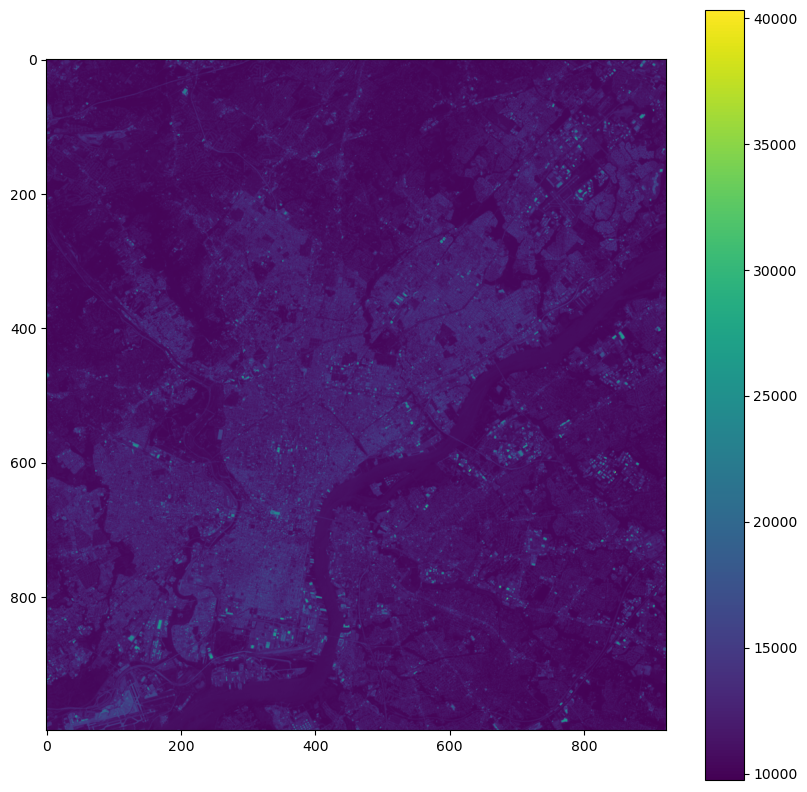

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
img = ax.imshow(data)
plt.colorbar(img)

## Overlay Vector Layer on a Raster

In [47]:
dem_bounds = (
    "./data/philadelphia-census-tract.gpkg"
)
dem_bounds_gdf = gpd.read_file(dem_bounds)



In [48]:
dem_bounds_gdf.crs

<Projected CRS: PROJCS["NAD83_Pennsylvania_South_ftUS",GEOGCS["NAD ...>
Name: NAD83_Pennsylvania_South_ftUS
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [49]:
dem_bounds_gdf = dem_bounds_gdf.to_crs(landsat_philly.crs)
dem_bounds_gdf.crs, landsat_philly.crs

(<Projected CRS: EPSG:32618>
 Name: WGS 84 / UTM zone 18N
 Axis Info [cartesian]:
 - [east]: Easting (metre)
 - [north]: Northing (metre)
 Area of Use:
 - undefined
 Coordinate Operation:
 - name: UTM zone 18N
 - method: Transverse Mercator
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 CRS.from_wkt('PROJCS["WGS 84 / UTM zone 18N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32618"]]'))

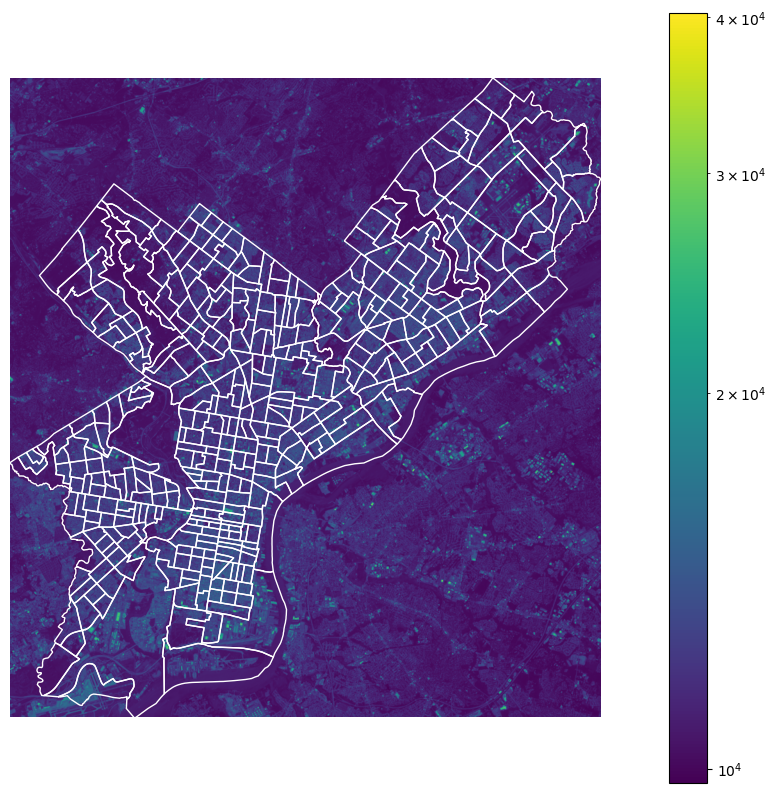

In [50]:
import matplotlib.colors as mcolors

# Initialize
fig, ax = plt.subplots(figsize=(10, 10))

# The extent of the data
landsat_extent = [
    landsat_philly.bounds.left,
    landsat_philly.bounds.right,
    landsat_philly.bounds.bottom,
    landsat_philly.bounds.top,
]

# Plot!
img = ax.imshow(data, 
                norm=mcolors.LogNorm(), 
                extent=landsat_extent)

# Add the city limits
dem_bounds_gdf.plot(ax=ax, facecolor="none", edgecolor="white")

# Add a colorbar and turn off axis lines
plt.colorbar(img)
ax.set_axis_off()

### Reading Multiple Bands

| Name   | Wavelength       | Description                                        |
|--------|------------------|----------------------------------------------------|
| SR_B1  | 0.435-0.451 μm   | Band 1 (ultra blue, coastal aerosol) surface reflectance |
| SR_B2  | 0.452-0.512 μm   | Band 2 (blue) surface reflectance                   |
| SR_B3  | 0.533-0.590 μm   | Band 3 (green) surface reflectance                  |
| SR_B4  | 0.636-0.673 μm   | Band 4 (red) surface reflectance                    |
| SR_B5  | 0.851-0.879 μm   | Band 5 (near infrared) surface reflectance          |
| SR_B6  | 1.566-1.651 μm   | Band 6 (shortwave infrared 1) surface reflectance   |
| SR_B7  | 2.107-2.294 μm   | Band 7 (shortwave infrared 2) surface reflectance   |

In [51]:
band_names = ["Coastal Aerosol", "Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]

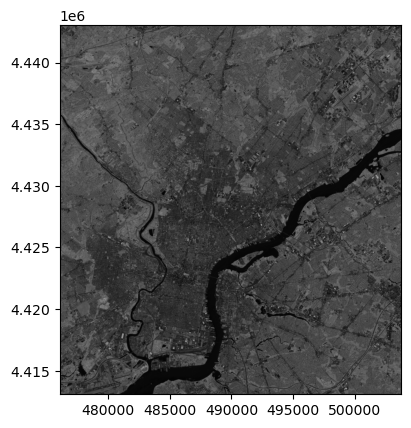

<Axes: >

In [52]:
rasterio.plot.show((landsat_philly, 5), cmap="Greys_r")

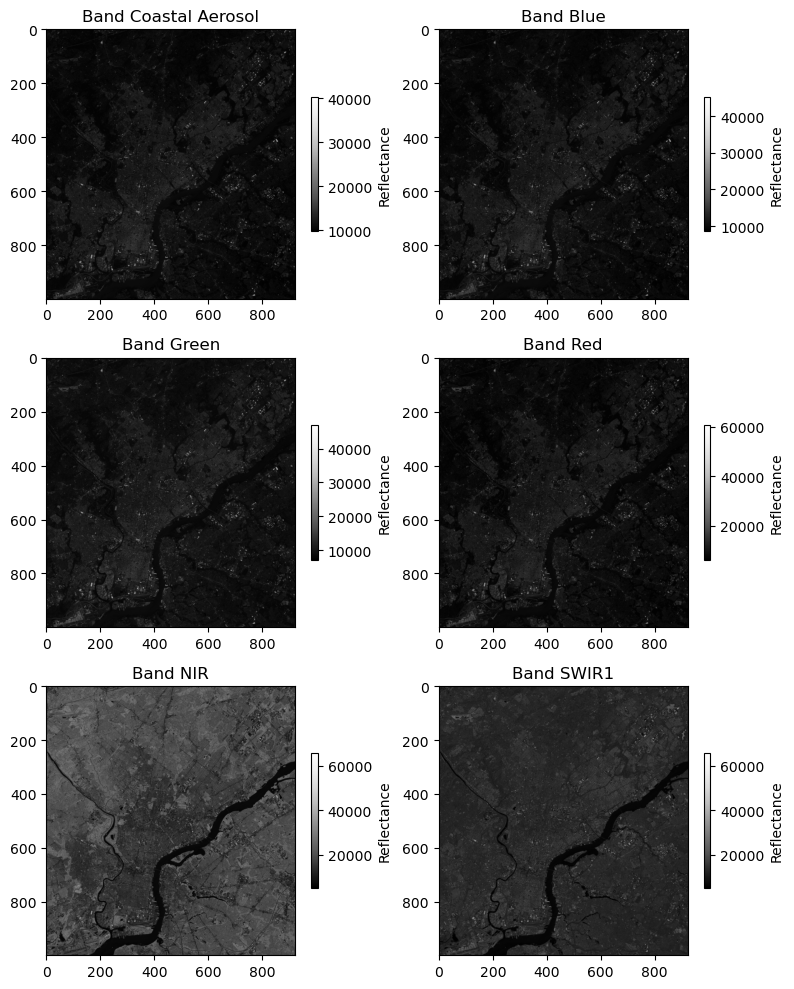

In [53]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

for band in range(1, 7):
    data = landsat_philly.read(band)
    ax = axes[band - 1]
    im = ax.imshow(data, cmap="Greys_r")
    ax.set_title(f"Band {band_names[band - 1]}")
    fig.colorbar(im, ax=ax, label="Reflectance", shrink=0.5)

plt.tight_layout()
plt.show()

In [54]:
nir_band = landsat_philly.read(5)
red_band = landsat_philly.read(4)
green_band = landsat_philly.read(3)

# Stack the bands into a single array
rgb_philly = np.dstack((nir_band, red_band, green_band))
rgb_philly = np.clip(rgb_philly, 0, 65535) / 65535 #rescale from 0-65535 to 0-1 for plot

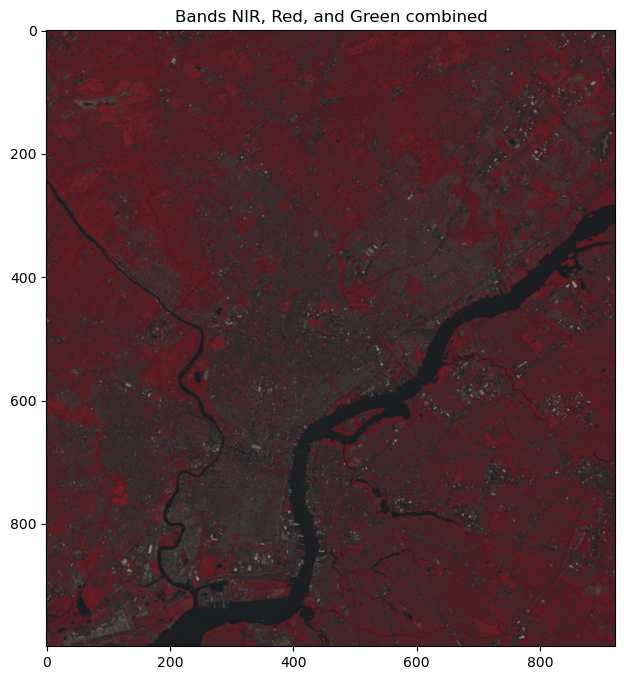

In [55]:
#Plot the stacked array
plt.figure(figsize=(8, 8))
plt.imshow(rgb_philly) 
plt.title("Bands NIR, Red, and Green combined")
plt.show()

## Clipping Rasters

In [56]:
rgb_philly.shape

(999, 923, 3)

In [57]:
subset = rgb_philly[600:800, 200:400].clip(0, 1)
print(subset.shape)

(200, 200, 3)


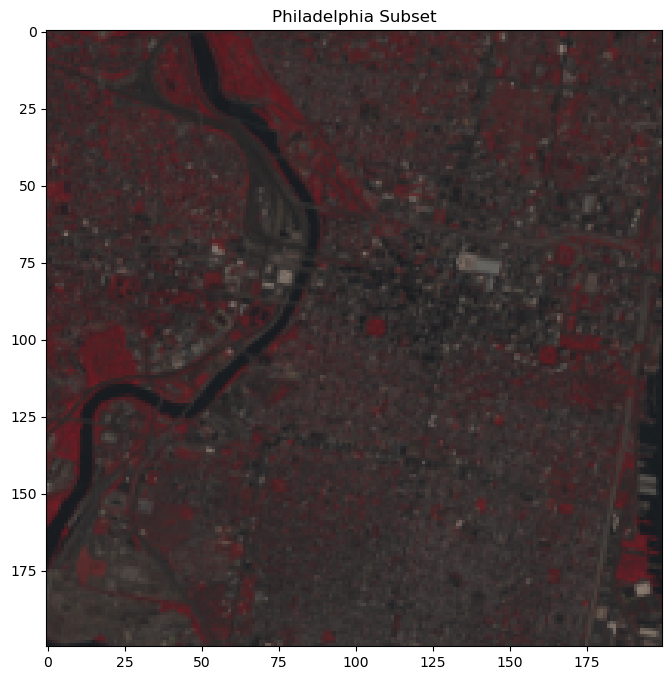

In [58]:
# Plot the stacked array
plt.figure(figsize=(8, 8))
plt.imshow(subset)
plt.title("Philadelphia Subset")
plt.show()

<Axes: >

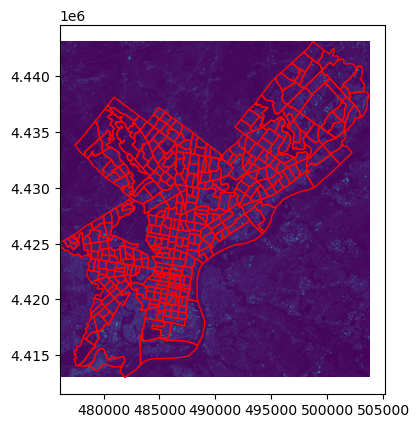

In [59]:
fig, ax = plt.subplots()
rasterio.plot.show(landsat_philly, ax=ax)
dem_bounds_gdf.plot(ax=ax, edgecolor="red", facecolor="none")

In [60]:
from rasterio.mask import mask

masked, out_transform = rasterio.mask.mask(landsat_philly, dem_bounds_gdf.geometry, crop=True)

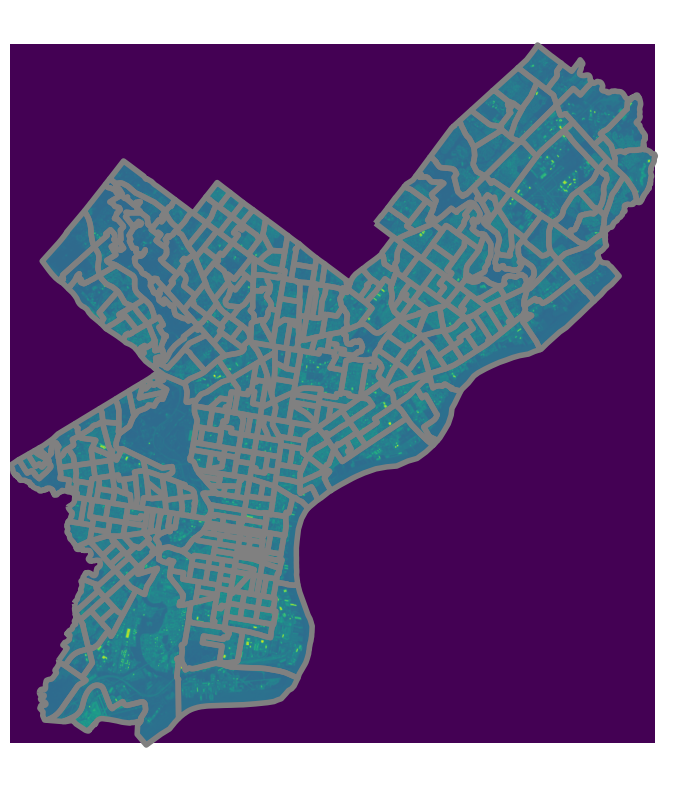

In [61]:
# Initialize
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the first band
ax.imshow(masked[0], cmap="viridis", extent=landsat_extent)

# Format and add the city limits
dem_bounds_gdf.boundary.plot(ax=ax, color="gray", linewidth=4)
ax.set_axis_off()



## Zonal Stats

In [85]:
# install rasterstats in your conda environment
!conda install -c conda-forge rasterstats

Channels:
 - conda-forge
 - defaults
Platform: linux-64
doneecting package metadata (repodata.json): - 
doneing environment: - 

# All requested packages already installed.



In [76]:
from rasterstats import zonal_stats

In [81]:
dem_bounds_gdf["ndvi"] = gpd.GeoDataFrame(
    zonal_stats(
        vectors=dem_bounds_gdf['geometry'], 
        raster=landsat_philly_path, 
        stats='mean'
    )
)['mean']

<Axes: >

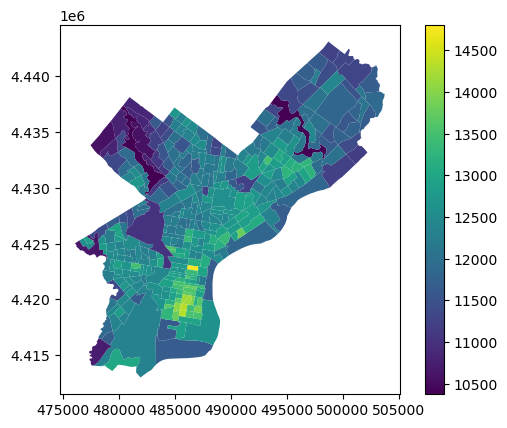

In [84]:
dem_bounds_gdf.plot(column='ndvi', cmap='viridis', legend=True)

### References
 - [Introduction to Geospatial Raster and Vector Data with Python](https://carpentries-incubator.github.io/geospatial-python/index.html)
 - [Introduction to GIS Programming](https://geog-312.gishub.org/book/geospatial/rasterio.html)
 - [Geospatial Data Science in Python](https://musa-550-fall-2020.github.io/)
 - [Work with Landsat Remote Sensing Data in Python](https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/landsat-in-Python/)


## Exercises

1. Select one location in the US and generate the NDVI map at the census tract level.

 - Collect the census tract boundaries for the location
 - Download landsat imagery for the city
 - Mask out those pixel out of the bounds
 - Calculate the NDVI by census tract
 - Generate the census tract level map of NDVI


2. Prepare a short presentation for the next class covering
 - Where you sourced your raster data
 - What is the program/source behind your raster data (ie. Landsat, Sentinel2, NAIP, etc.)
 - How your raster data was distributed and the level of processing for the distributed data 
 - Where you sourced your vector data
 - What processing did you need to do to use the raster and vector data together
 - Show your NDVI plot

3. Calculate NDWI from raster bands
 - Open the multispectral image (`"./data/landsat8_philly.tif"`) and extract the Green and Near-Infrared (NIR) bands.
 - Compute the Normalized Difference Water Index (NDWI) using the formula:
 - NDWI= (Green - NIR) / (Green + NIR)
 - Visualize the NDWI result using a water-friendly colormap (e.g., cmap=’Blues’) to highlight water bodies.
 - Save the resulting NDWI image as a new raster file named ndwi.tif.


4. Clip raster
 - Open the multispectral image and clip a geographic subset using array indexing (specifying row and column ranges).
 - Visualize the clipped portion of the image using matplotlib to ensure the subset is correct.
 - Save the clipped raster subset to a new file.
